# Logistic Regression: Classification Fundamentals

> **"Logistic regression is the foundation of classification in machine learning."**

## Learning Objectives
- Understand the mathematical foundation of logistic regression
- Implement logistic regression from scratch using gradient descent
- Learn about the sigmoid function and decision boundaries
- Master multiclass classification strategies
- Apply logistic regression to real-world classification problems


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Mathematical Foundation

### Logistic Function (Sigmoid)
The logistic function transforms any real number into a probability between 0 and 1.

**Mathematical definition:**
$\sigma(z) = \frac{1}{1 + e^{-z}}$

Where $z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

### Cost Function
Logistic regression uses the log-likelihood cost function:

$J(\beta) = -\frac{1}{m}\sum_{i=1}^{m}[y_i \log(h_\beta(x_i)) + (1-y_i)\log(1-h_\beta(x_i))]$

Where:
- $h_\beta(x_i)$ is the predicted probability
- $y_i$ is the actual label (0 or 1)
- $m$ is the number of samples


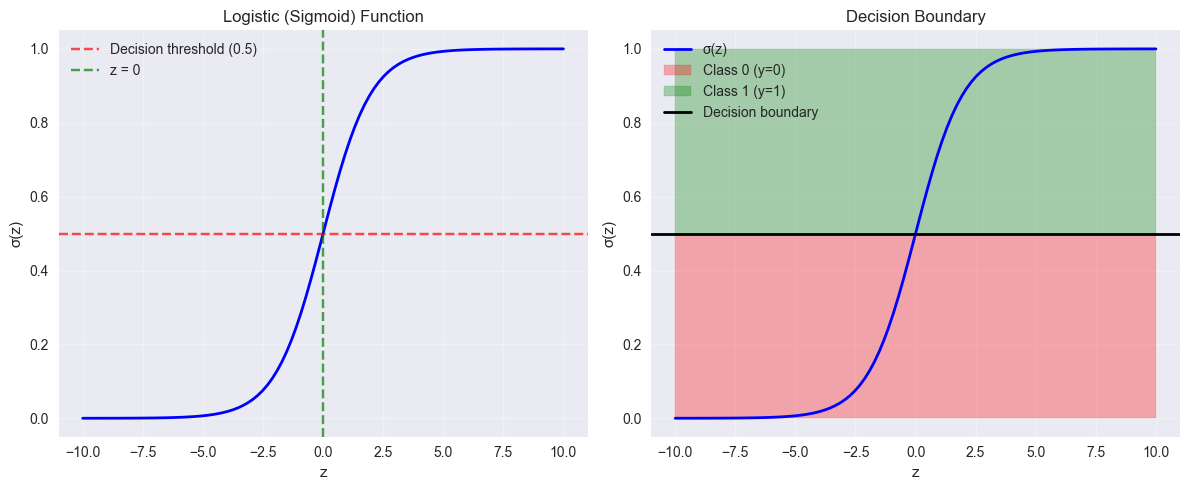

Key properties of the sigmoid function:
σ(0) = 0.500
σ(∞) = 1.000 (approaches 1)
σ(-∞) = 0.000 (approaches 0)
σ(2) = 0.881
σ(-2) = 0.119


In [2]:
# Visualize the logistic function
def sigmoid(z):
    """Sigmoid function implementation."""
    return 1 / (1 + np.exp(-z))

# Generate z values
z = np.linspace(-10, 10, 100)
sigma_z = sigmoid(z)

# Plot sigmoid function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(z, sigma_z, 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision threshold (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.7, label='z = 0')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Logistic (Sigmoid) Function')
plt.legend()
plt.grid(True, alpha=0.3)

# Show decision boundary
plt.subplot(1, 2, 2)
plt.plot(z, sigma_z, 'b-', linewidth=2, label='σ(z)')
plt.fill_between(z, 0, 0.5, alpha=0.3, color='red', label='Class 0 (y=0)')
plt.fill_between(z, 0.5, 1, alpha=0.3, color='green', label='Class 1 (y=1)')
plt.axhline(y=0.5, color='black', linestyle='-', linewidth=2, label='Decision boundary')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Decision Boundary')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key properties of the sigmoid function:")
print(f"σ(0) = {sigmoid(0):.3f}")
print(f"σ(∞) = {sigmoid(10):.3f} (approaches 1)")
print(f"σ(-∞) = {sigmoid(-10):.3f} (approaches 0)")
print(f"σ(2) = {sigmoid(2):.3f}")
print(f"σ(-2) = {sigmoid(-2):.3f}")


Dataset Overview:
Training set shape: (800, 2)
Test set shape: (200, 2)
Class distribution in training set: [401 399]
Class distribution in test set: [100 100]


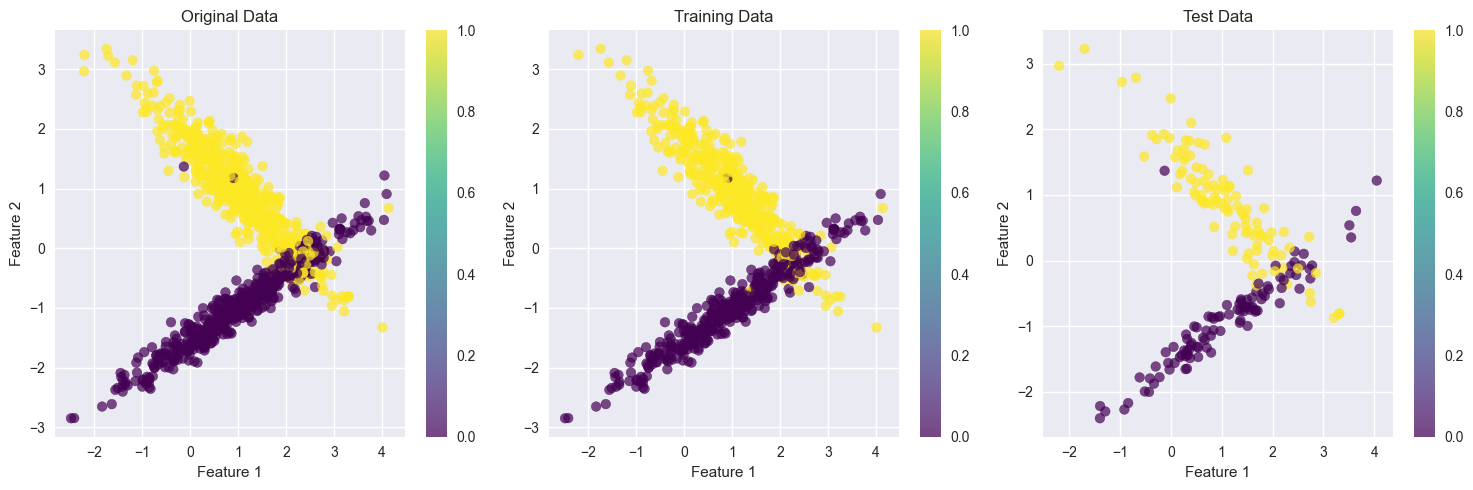

In [3]:
# Generate sample data for logistic regression
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1, 
                          random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dataset Overview:")
print("=" * 50)
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")

# Visualize the data
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.colorbar(scatter)

# Training data
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.colorbar(scatter)

# Test data
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()


Model Performance:
Accuracy: 0.900
AUC Score: 0.948

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       100
           1       0.93      0.87      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


Confusion Matrix:
True Negatives: 93, False Positives: 7
False Negatives: 13, True Positives: 87


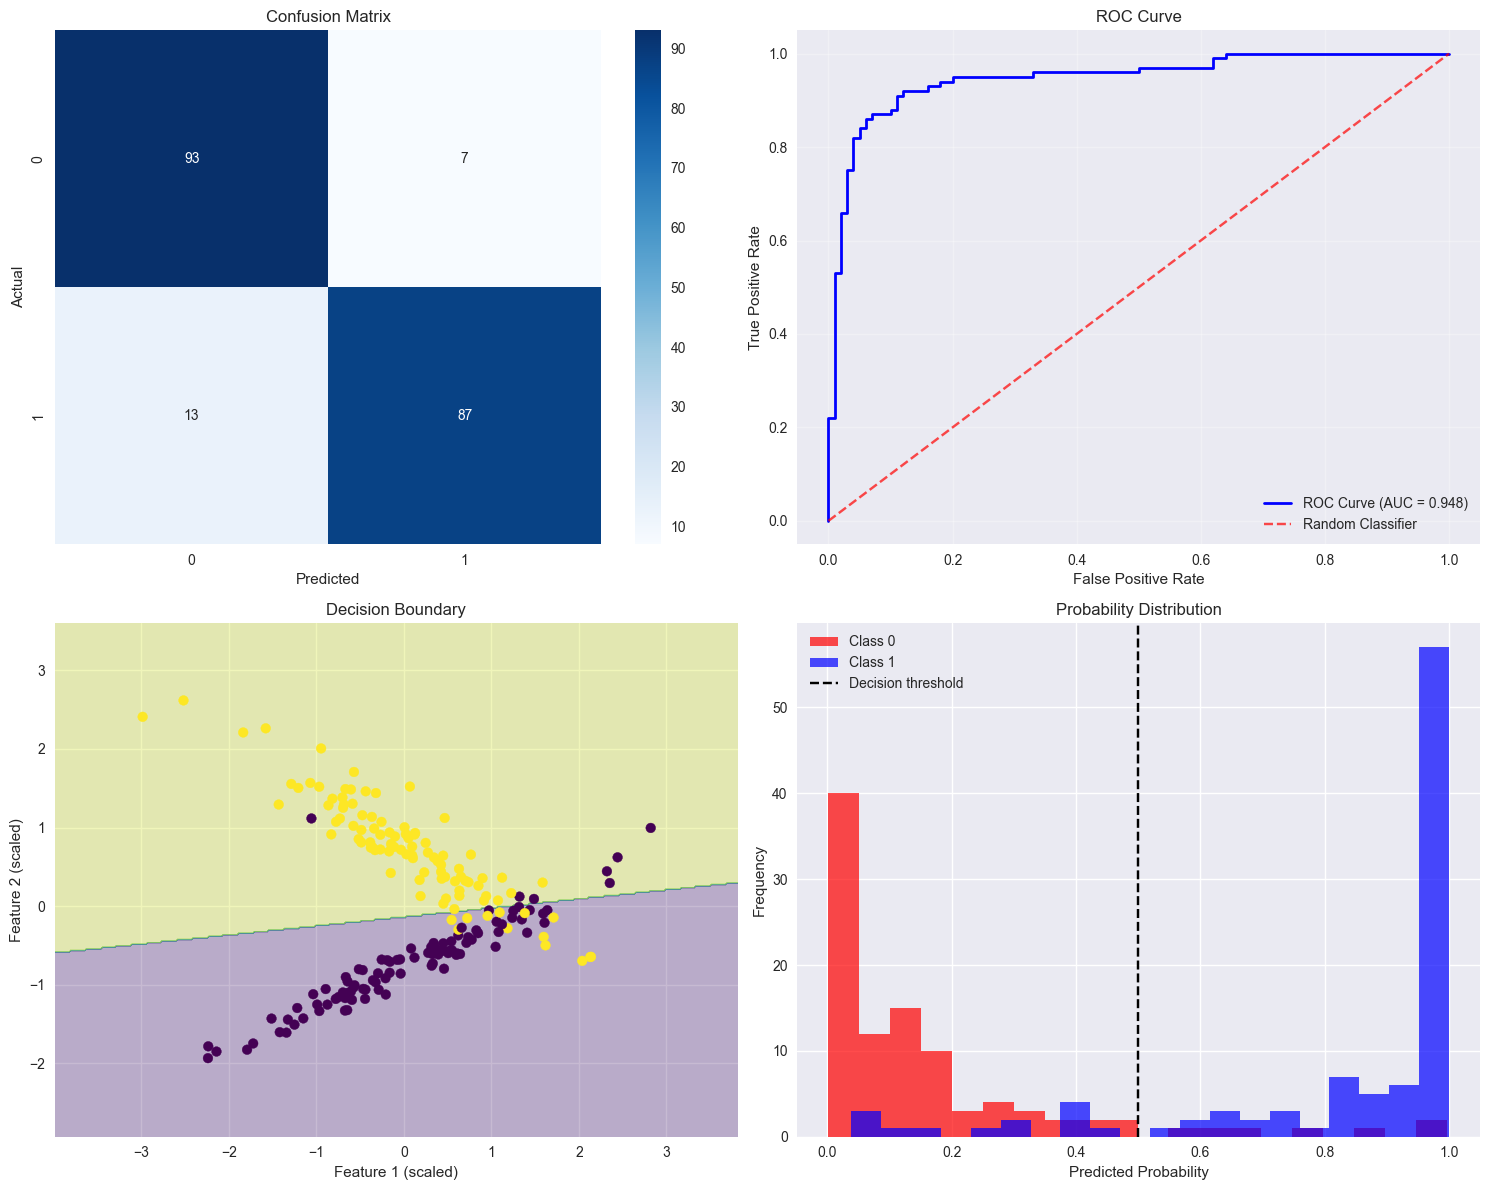

In [4]:
# Train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("Model Performance:")
print("=" * 50)
print(f"Accuracy: {accuracy:.3f}")
print(f"AUC Score: {auc_score:.3f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[0,1].plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.3f})')
axes[0,1].plot([0, 1], [0, 1], 'r--', alpha=0.7, label='Random Classifier')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curve')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Decision Boundary
h = 0.02
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1,0].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = axes[1,0].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis')
axes[1,0].set_xlabel('Feature 1 (scaled)')
axes[1,0].set_ylabel('Feature 2 (scaled)')
axes[1,0].set_title('Decision Boundary')

# Probability Distribution
axes[1,1].hist(y_pred_proba[y_test == 0], bins=20, alpha=0.7, label='Class 0', color='red')
axes[1,1].hist(y_pred_proba[y_test == 1], bins=20, alpha=0.7, label='Class 1', color='blue')
axes[1,1].axvline(x=0.5, color='black', linestyle='--', label='Decision threshold')
axes[1,1].set_xlabel('Predicted Probability')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Probability Distribution')
axes[1,1].legend()

plt.tight_layout()
plt.show()
